# **FILE PREPARATION!**

---

## **Library**

In [1]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import zipfile
import matplotlib.image as mpimg

# libraries for TF and transfer learning
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from google.colab import files

# warnings
import warnings
warnings.filterwarnings('ignore')

print('Importing libraries completed.')

Importing libraries completed.


## **Data Preparation**

In [2]:
# Connect google colab with your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Extract the dataset
!unzip '/content/drive/MyDrive/Capstone Dataset/Custom_Fruits&Vegetables.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Custom_Fruits&Vegetables/Fruits/RottenBanana/rottenBanana (260).jpg  
  inflating: __MACOSX/Custom_Fruits&Vegetables/Fruits/RottenBanana/._rottenBanana (260).jpg  
  inflating: Custom_Fruits&Vegetables/Fruits/RottenBanana/rottenBanana (325).jpg  
  inflating: __MACOSX/Custom_Fruits&Vegetables/Fruits/RottenBanana/._rottenBanana (325).jpg  
  inflating: Custom_Fruits&Vegetables/Fruits/RottenBanana/rottenBanana (91).jpg  
  inflating: __MACOSX/Custom_Fruits&Vegetables/Fruits/RottenBanana/._rottenBanana (91).jpg  
  inflating: Custom_Fruits&Vegetables/Fruits/RottenBanana/rottenBanana (149).jpg  
  inflating: __MACOSX/Custom_Fruits&Vegetables/Fruits/RottenBanana/._rottenBanana (149).jpg  
  inflating: Custom_Fruits&Vegetables/Fruits/RottenBanana/rottenBanana (519).jpg  
  inflating: __MACOSX/Custom_Fruits&Vegetables/Fruits/RottenBanana/._rottenBanana (519).jpg  
  inflating: Custom_Fruits&Vegetables/Fruits/RottenBanana/rottenBa

In [4]:
# Define temporary path
mypath = '/content/Custom_Fruits&Vegetables'

In [5]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name).replace("\\","/")) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [6]:
# Input the variables that have been collected in the loop above
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
FreshApple           612
FreshBanana          624
FreshBellpepper      611
FreshBitterGourd     327
FreshCarrot          620
FreshCucumber        608
FreshMango           605
FreshOkra            635
FreshOrange          609
FreshPotato          615
FreshStrawberry      603
FreshTomato          604
RottenApple          588
RottenBanana         576
RottenBellpepper     591
RottenBitterGourd    357
RottenCarrot         580
RottenCucumber       593
RottenMango          593
RottenOkra           338
RottenOrange         591
RottenPotato         585
RottenStrawberry     596
RottenTomato         596
dtype: int64

In [7]:
# Check the sample data
df.head()

,path,file_name,tag
0,/content/Custom_Fruits&Vegetables/Fruits/Fresh...,freshStrawberry (478).jpg,FreshStrawberry
1,/content/Custom_Fruits&Vegetables/Fruits/Fresh...,freshStrawberry (102).jpg,FreshStrawberry
2,/content/Custom_Fruits&Vegetables/Fruits/Fresh...,freshStrawberry (373).jpg,FreshStrawberry
3,/content/Custom_Fruits&Vegetables/Fruits/Fresh...,freshStrawberry (236).jpg,FreshStrawberry
4,/content/Custom_Fruits&Vegetables/Fruits/Fresh...,freshStrawberry (562).jpg,FreshStrawberry


In [8]:
# Variables used in this data separation
x = df['path']
y = df['tag']

In [9]:
# Split the initial dataset into train & test data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.10, 
                                                    random_state = 300)

In [10]:
# Divide the test data into 2 (validation and test data)
x_test, x_val, y_test, y_val = train_test_split(x, y, 
                                                test_size = 0.50,
                                                random_state = 100)

In [11]:
# Create a dataframe for each of the split
df_train = pd.DataFrame({'path':x_train
              ,'tag':y_train
             ,'set':'train'})

df_test = pd.DataFrame({'path':x_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':x_val
              ,'tag':y_val
             ,'set':'validation'})

In [12]:
print('train size', len(df_train))
print('val size', len(df_test))
print('test size', len(df_val))

train size 12291
val size 6828
test size 6829


In [13]:
# Check the proportion in each set, is it appropiate or not
df_all = df_train.append([df_test,df_val]).reset_index(drop=1)

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

# check the sample data
df_all.sample(3)


set         tag             
test        FreshApple          308
            FreshBanana         322
            FreshBellpepper     283
            FreshBitterGourd    146
            FreshCarrot         306
                               ... 
validation  RottenOkra          165
            RottenOrange        287
            RottenPotato        292
            RottenStrawberry    284
            RottenTomato        313
Length: 72, dtype: int64 




,path,tag,set
20399,/content/Custom_Fruits&Vegetables/Vegetables/R...,RottenBellpepper,validation
18209,/content/Custom_Fruits&Vegetables/Vegetables/F...,FreshTomato,test
13927,/content/Custom_Fruits&Vegetables/Vegetables/R...,RottenBitterGourd,test


## **Tidy up to Each Set Folder**

In [14]:
# delete previous dataset folder if needed
# !rm -rf dataset/

In [15]:
import shutil
from tqdm.notebook import tqdm as tq

In [16]:
# Create the data source path and the destination of the dataset path
datasource_path = '/content/Custom_Fruits&Vegetables'
dataset_path = '/content/fruits & vegetables dataset'

In [17]:
for index, row in tq(df_all.iterrows(), ):
    
    # Detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    # Make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    # Define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    # Copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

# **Data Preprocessing**

---

In [18]:
# Make a train, validation, & test directory
train_dir = "/content/fruits & vegetables dataset/train"
train_class = os.listdir(train_dir)
print(train_class)
print("\n")

val_dir = "/content/fruits & vegetables dataset/validation"
val_class = os.listdir(val_dir)
print(val_class)
print("\n")

test_dir = "/content/fruits & vegetables dataset/test"
test_class = os.listdir(test_dir)
print(test_class)

['RottenCucumber', 'FreshBitterGourd', 'RottenTomato', 'FreshOkra', 'FreshStrawberry', 'FreshApple', 'FreshOrange', 'RottenApple', 'FreshCarrot', 'FreshCucumber', 'RottenMango', 'FreshTomato', 'RottenOrange', 'FreshBellpepper', 'RottenBitterGourd', 'FreshMango', 'FreshPotato', 'RottenOkra', 'FreshBanana', 'RottenBanana', 'RottenPotato', 'RottenStrawberry', 'RottenCarrot', 'RottenBellpepper']


['RottenCucumber', 'FreshBitterGourd', 'RottenTomato', 'FreshOkra', 'FreshStrawberry', 'FreshApple', 'FreshOrange', 'RottenApple', 'FreshCarrot', 'FreshCucumber', 'RottenMango', 'FreshTomato', 'RottenOrange', 'FreshBellpepper', 'RottenBitterGourd', 'FreshMango', 'FreshPotato', 'RottenOkra', 'FreshBanana', 'RottenBanana', 'RottenPotato', 'RottenStrawberry', 'RottenCarrot', 'RottenBellpepper']


['RottenCucumber', 'FreshBitterGourd', 'RottenTomato', 'FreshOkra', 'FreshStrawberry', 'FreshApple', 'FreshOrange', 'RottenApple', 'FreshCarrot', 'FreshCucumber', 'RottenMango', 'FreshTomato', 'RottenOrange

## **Sample Images**

In [19]:
# Define the variables
random_img1 = random.sample(os.listdir('/content/fruits & vegetables dataset/train/FreshApple'), 4)
random_img2 = random.sample(os.listdir('/content/fruits & vegetables dataset/train/RottenMango'), 4)

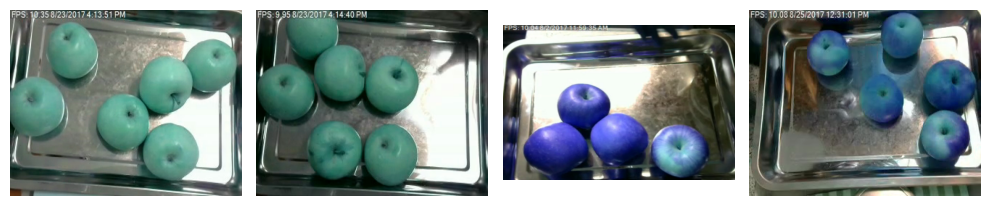

In [20]:
# Plot the images
fig = plt.figure(figsize = (10,10))
for i, im in enumerate(random_img1):
  plt.subplot(2, 4, i+1)
  im = cv2.imread(os.path.join('/content/fruits & vegetables dataset/train/FreshApple', im))
  plt.imshow(im)
  plt.axis('off')

plt.tight_layout()
plt.show()

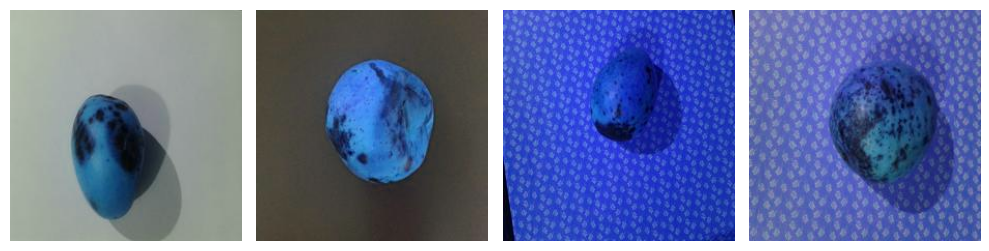

In [21]:
# Plot the images
fig = plt.figure(figsize = (10,10))
for i, im in enumerate(random_img2):
  plt.subplot(2, 4, i+1)
  im = cv2.imread(os.path.join('/content/fruits & vegetables dataset/train/RottenMango', im))
  plt.imshow(im)
  plt.axis('off')

plt.tight_layout()
plt.show()

# **Model Train**

---

## **Image Augmentation**

In [22]:
def train_val_generators(train_dir, val_dir):
# Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

# Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=45,
                                                      class_mode='categorical',
                                                      target_size=(128, 128))

# Instantiate the ImageDataGenerator class 
  validation_datagen = ImageDataGenerator(rescale = 1./255.)  

# Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                batch_size=45,
                                                                class_mode='categorical',
                                                                target_size=(128, 128))

  return train_generator, validation_generator

In [23]:
# Test the generators
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 12279 images belonging to 24 classes.
Found 6822 images belonging to 24 classes.


## **Model Building**

In [24]:
# Building model
mnet = MobileNetV2(include_top = False, 
                   weights = 'imagenet', 
                   input_shape=(128,128,3))

9406464/9406464 [==============================] - 1s 0us/step


In [25]:
tf.keras.backend.clear_session()

model = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    Dense(64, activation = "relu"),
                    Dropout(0.3),
                    Dense(24, activation = "softmax")])

model.layers[0].trainable = False

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics="accuracy")

model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

## **Callbacks**

In [26]:
def scheduler(epoch):
  if epoch <= 2:
    return 0.001
  elif epoch > 2 and epoch <= 15:
    return 0.0001
  else:
    return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [27]:
DESIRED_ACCURACY = 0.95

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') is not None and logs.get('accuracy') >= DESIRED_ACCURACY):
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
callbacks = MyCallback()

## **Training**

In [28]:
epochs = 10
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = epochs,
                    verbose = 1,
                    callbacks = [lr_callbacks, callbacks]
                    )

Epoch 1/10
273/273 [==============================] - 432s 2s/step - loss: 1.1837 - accuracy: 0.6540 - val_loss: 0.3425 - val_accuracy: 0.8923 - lr: 0.0010
Epoch 2/10
273/273 [==============================] - 420s 2s/step - loss: 0.5895 - accuracy: 0.8217 - val_loss: 0.2788 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 3/10
273/273 [==============================] - 410s 2s/step - loss: 0.4837 - accuracy: 0.8458 - val_loss: 0.2490 - val_accuracy: 0.9184 - lr: 0.0010
Epoch 4/10
273/273 [==============================] - 430s 2s/step - loss: 0.3998 - accuracy: 0.8730 - val_loss: 0.1954 - val_accuracy: 0.9335 - lr: 1.0000e-04
Epoch 5/10
273/273 [==============================] - 431s 2s/step - loss: 0.3629 - accuracy: 0.8885 - val_loss: 0.1846 - val_accuracy: 0.9389 - lr: 1.0000e-04
Epoch 6/10
273/273 [==============================] - 426s 2s/step - loss: 0.3425 - accuracy: 0.8903 - val_loss: 0.1804 - val_accuracy: 0.9405 - lr: 1.0000e-04
Epoch 7/10
273/273 [==============================] 

# **Visualize The Result**

---

## **Plot Loss & Accuracy**

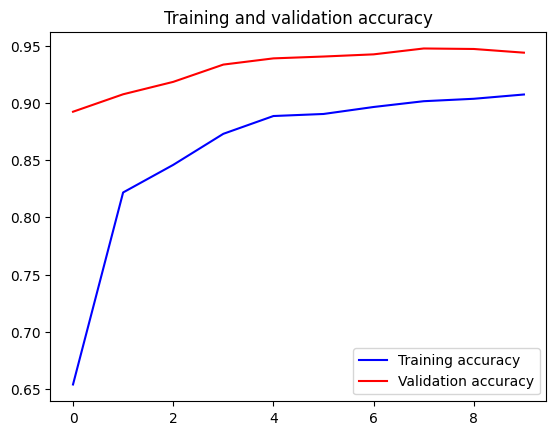

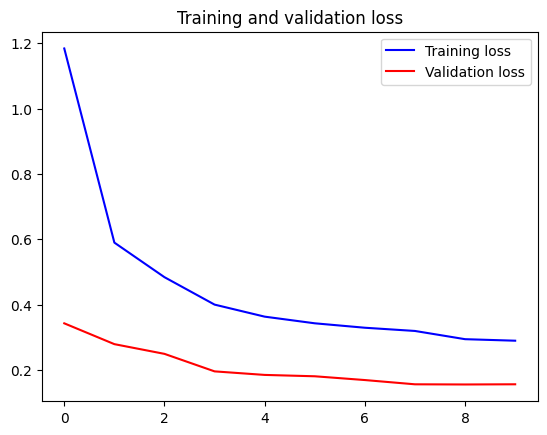

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

## **Evaluate Model**

In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(128,128),
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 6821 images belonging to 24 classes.
6821/6821 [==============================] - 214s 31ms/step - loss: 0.1488 - accuracy: 0.9493
accuracy test:  0.9492743015289307
loss test:  0.14875173568725586


# **Save The Model**

---

If you wanna to save the model as .h5, run this cell below:

In [33]:
 #model.save('saved_model.h5')

If you wanna to save the model as .pb, run this cell below: 

In [34]:
# Copy our created model for safe
#save_model = model

# Set learning phase to 0
#tf.keras.backend.set_learning_phase(0) # Ignore Dropout when inferencing

# Model path
#export_path = '/content/saved_model/freshness_classifier/1'

# Create the model path
#if os.path.exists(export_path) == False:
#  os.makedirs(export_path)

# Save the model
#tf.saved_model.save(save_model, export_path)